In [1]:
from fcm_bundle import FCM, Noise_Robust_FCM, Kernel_FCM

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
X,_ = make_blobs(n_samples = 200, random_state = 170)


In [4]:
fcm = FCM(3)
A, B, C = fcm.fit(X)

In [5]:
B

array([[-9.12140473, -5.44636014],
       [-4.64251204,  0.23061466],
       [ 2.25040686,  0.43768542]])

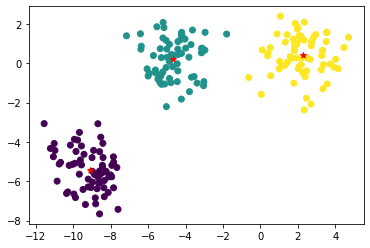

In [6]:
plt.scatter(X[:,0], X[:,1], c= A)
plt.scatter(B[:,0], B[:,1], marker = '*', c= 'r')

In [7]:
fcm.Xie_Beni_Index()

-1.8031389895065316e-16

In [8]:
fcm.Partition_Entropy()

0.2350993393959982

In [9]:
fcm.FPC()

0.8916036282684798

### Image segnetation Test

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
def show(img):
    h, w = img.shape[:2]
    plt.figure(figsize=(w / 100, h / 100))
    plt.imshow(Image.fromarray(img.astype(np.uint8)), vmin=0, vmax=255)
    return plt.show()

plt.gray()

<Figure size 432x288 with 0 Axes>

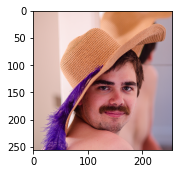

In [12]:
lena = np.array(Image.open("lena.png"))
show(lena)

In [13]:
import cv2

In [14]:
image = cv2.imread("lena.png")

In [15]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [16]:
lab, cen, mat = fcm.fit(pixel_values)
cen = np.uint8(cen)

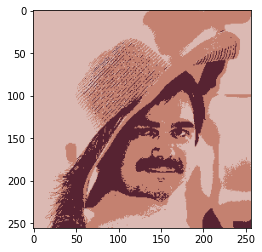

In [17]:
segmented_image = cen[lab.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(lena.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

In [18]:
lena.shape

(256, 256, 3)